In [142]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.metrics import confusion_matrix

import h2o
from h2o.automl import H2OAutoML

import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
iris = datasets.load_iris(as_frame=True).frame
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [55]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [57]:
target = 'target'

In [59]:
iris[target].value_counts(normalize=True).round(2)

target
0    0.33
1    0.33
2    0.33
Name: proportion, dtype: float64

## H20

In [24]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 31 mins
H2O_cluster_timezone:,Asia/Baku
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 12 days
H2O_cluster_name:,H2O_from_python_tarlanjabiyev_sccwo1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.411 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [61]:
h2o_data = h2o.H2OFrame(iris)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


## Datanın bölünməsi

In [74]:
h2o_data[target] = h2o_data[target].asfactor()

In [76]:
train, test = h2o_data.split_frame(ratios=[0.8], seed=123)

In [77]:
features = iris.drop(columns=[target]).columns.to_list()

## AutoML

In [80]:
model = H2OAutoML(
    stopping_metric = 'mean_per_class_error',
    nfolds = 10, seed = 123,
    balance_classes = True,
    max_runtime_secs = 300
)

model.train(
    x = features, y = target,
    training_frame = train,
    validation_frame = test,
    leaderboard_frame = test
)

AutoML progress: |
11:19:16.77: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

██████
11:19:20.456: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 121.0.

█████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_12_20250909_111916


GLM Model: summary
    family       link         regularization               lambda_search                                                                    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  -----------  -----------  ---------------------------  -------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -------------------------------------------------
    multinomial  multinomial  Ridge ( lambda = 4.773E-4 )  nlambda = 30, lambda.max = 44.088, lambda.min = 4.773E-4, lambda.1se = 0.001993  15                            12                             86                      AutoML_12_20250909_111916_training_py_10_sid_a77f

ModelMetricsMultinomialGLM: glm
** Reported on train data. **

MSE: 0.01564911712463816
RMSE: 0.12509643130256817
LogLoss: 0.05720608418962844
Null degrees of freedom: 120
Residual degrees of freedom: 106
Null deviance: 265.74889937138096
Residual deviance: 13.843872373890083
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    Error      Rate
---  ---  ---  ---------  -------
42   0    0    0          0 / 42
0    37   3    0.075      3 / 40
0    1    38   0.025641   1 / 39
42   38   41   0.0330579  4 / 121

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.966942
2    1
3    1

ModelMetricsMultinomialGLM: glm
** Reported on validation data. **

MSE: 0.026072727685831777
RMSE: 0.1614705164599153
LogLoss: 0.0903238674444921
Null degrees of freedom: 28
Residual degrees of freedom: 14
Null deviance: 63.977192454946135
Residual deviance: 5.238784311780542
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    Error      Rate
---  ---  ---  ---------  ------
8    0    0    0          0 / 8
0    10   0    0          0 / 10
0    1    10   0.0909091  1 / 11
8    11   10   0.0344828  1 / 29

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.965517
2    1
3    1

ModelMetricsMultinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.025342449588299638
RMSE: 0.15919312041762243
LogLoss: 0.08298849553285806
Null degrees of freedom: 120
Residual degrees of freedom: 106
Null deviance: 265.87499285688835
Residual deviance: 20.083215918951655
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    Error      Rate
---  ---  ---  ---------  -------
42   0    0    0          0 / 42
0    37   3    0.075      3 / 40
0    1    38   0.025641   1 / 39
42   38   41   0.0330579  4 / 121

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.966942
2    1
3    1

Cross-Validation Metrics Summary: 
                         mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_

In [83]:
model.leaderboard.as_data_frame()

/opt/anaconda3/lib/python3.12/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,model_id,mean_per_class_error,logloss,rmse,mse
0,GLM_1_AutoML_12_20250909_111916,0.030303,0.090324,0.161471,0.026073
1,StackedEnsemble_BestOfFamily_1_AutoML_12_20250...,0.030303,0.097378,0.170229,0.028978
2,GBM_2_AutoML_12_20250909_111916,0.090909,0.273373,0.284478,0.080928
3,GBM_3_AutoML_12_20250909_111916,0.090909,0.298082,0.297625,0.088581
4,StackedEnsemble_BestOfFamily_2_AutoML_12_20250...,0.090909,0.170212,0.239670,0.057442
5,StackedEnsemble_AllModels_1_AutoML_12_20250909...,0.090909,0.180316,0.246429,0.060727
6,DRF_1_AutoML_12_20250909_111916,0.121212,0.222702,0.280209,0.078517
7,XGBoost_3_AutoML_12_20250909_111916,0.121212,0.332789,0.325449,0.105917
8,GBM_5_AutoML_12_20250909_111916,0.121212,0.328681,0.299337,0.089602
9,XGBoost_1_AutoML_12_20250909_111916,0.121212,0.427265,0.359209,0.129031


In [85]:
leader_model = model.leader
leader_model

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_12_20250909_111916


GLM Model: summary
    family       link         regularization               lambda_search                                                                    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  -----------  -----------  ---------------------------  -------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -------------------------------------------------
    multinomial  multinomial  Ridge ( lambda = 4.773E-4 )  nlambda = 30, lambda.max = 44.088, lambda.min = 4.773E-4, lambda.1se = 0.001993  15                            12                             86                      AutoML_12_20250909_111916_training_py_10_sid_a77f

ModelMetricsMultinomialGLM: glm
** Reported on train data. **

MSE: 0.01564911712463816
RMSE: 0.12509643130256817
LogLoss: 0.05720608418962844
Null degrees of freedom: 120
Residual degrees of freedom: 106
Null deviance: 265.74889937138096
Residual deviance: 13.843872373890083
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    Error      Rate
---  ---  ---  ---------  -------
42   0    0    0          0 / 42
0    37   3    0.075      3 / 40
0    1    38   0.025641   1 / 39
42   38   41   0.0330579  4 / 121

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.966942
2    1
3    1

ModelMetricsMultinomialGLM: glm
** Reported on validation data. **

MSE: 0.026072727685831777
RMSE: 0.1614705164599153
LogLoss: 0.0903238674444921
Null degrees of freedom: 28
Residual degrees of freedom: 14
Null deviance: 63.977192454946135
Residual deviance: 5.238784311780542
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    Error      Rate
---  ---  ---  ---------  ------
8    0    0    0          0 / 8
0    10   0    0          0 / 10
0    1    10   0.0909091  1 / 11
8    11   10   0.0344828  1 / 29

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.965517
2    1
3    1

ModelMetricsMultinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.025342449588299638
RMSE: 0.15919312041762243
LogLoss: 0.08298849553285806
Null degrees of freedom: 120
Residual degrees of freedom: 106
Null deviance: 265.87499285688835
Residual deviance: 20.083215918951655
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    Error      Rate
---  ---  ---  ---------  -------
42   0    0    0          0 / 42
0    37   3    0.075      3 / 40
0    1    38   0.025641   1 / 39
42   38   41   0.0330579  4 / 121

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.966942
2    1
3    1

Cross-Validation Metrics Summary: 
                         mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_

## Proqnozlar

In [87]:
pred = leader_model.predict(test).as_data_frame()
pred

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/opt/anaconda3/lib/python3.12/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,predict,p0,p1,p2
0,0,9.974752e-01,0.002525,5.724992e-14
1,0,9.953530e-01,0.004647,2.689170e-14
2,0,9.993945e-01,0.000606,3.165071e-16
3,0,9.980974e-01,0.001903,9.910100e-15
4,0,9.997102e-01,0.000290,3.437065e-16
5,0,9.977050e-01,0.002295,1.588647e-14
6,0,9.975174e-01,0.002483,1.017556e-12
7,0,9.990616e-01,0.000938,2.835302e-15
8,1,4.179505e-05,0.929739,7.021937e-02
9,1,1.134273e-02,0.981909,6.748311e-03


## Qarışıqlıq matrisi 

In [116]:
actual = test.as_data_frame()[target]
pred_class = pred['predict']

/opt/anaconda3/lib/python3.12/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [118]:
y_true = np.asarray(actual, dtype=int)
y_preds = np.asarray(pred_class, dtype=int)

In [127]:
cm = confusion_matrix(y_true, y_preds, labels=[0, 1, 2])
cm

array([[ 8,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 10]])

In [129]:
cm_df = pd.DataFrame(cm,
                     index=pd.Index([0,1,2], name="Actual"),
                     columns=pd.Index([0,1,2], name="Predicted"))
cm_df

Predicted,0,1,2
Actual,,,
0,8,0,0
1,0,10,0
2,0,1,10


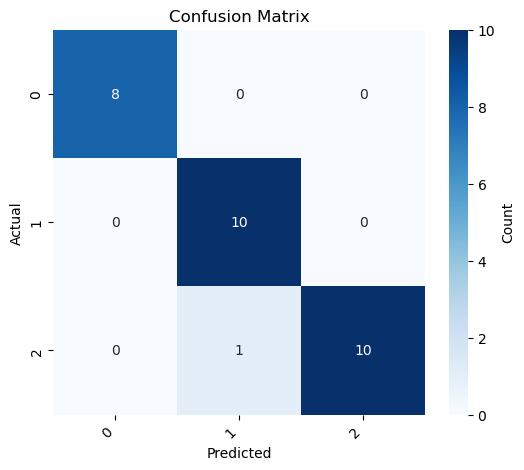

In [144]:
plt.figure(figsize=(6, 5))
ax = sns.heatmap(
    cm_df,
    annot=True, fmt="d",
    cmap="Blues", vmin=0,
    cbar_kws={"label": "Count"}
)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()